# myChEMBL iPython Notebook Tutorial

## A Chemoinformatics taster using the RDKit toolkit and cartridge, the ChEMBL database and Pandas

### myChEMBL team, ChEMBL group, EMBL-EBI.

#### myChEMBL publication (Open Access): http://bioinformatics.oxfordjournals.org/content/early/2013/11/20/bioinformatics.btt666.abstract

#### Start with something relatively easy

In [224]:
print 'Hello World!'

Hello World!


In [225]:
1+4

5

#### Import IPython helpers

In [226]:
%matplotlib inline
%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


#### Import RDKit libraries

In [227]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit import DataStructs

### Simple RDKit stuff - Molecules, descriptors and similarity

#### Molecule from SMILES

In [228]:
smi = 'CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4' #sildenafil
m = Chem.MolFromSmiles(smi)

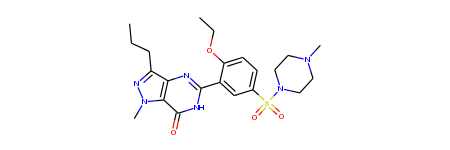

In [229]:
m

#### Simple descriptors

In [230]:
Descriptors.MolWt(m)

474.5870000000004

In [231]:
Descriptors.TPSA(m)

113.41999999999999

In [232]:
Descriptors.RingCount(m)

4

#### Output to various text formats

In [233]:
Chem.MolToSmiles(m, True)

'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12'

In [234]:
Chem.MolToInchi(m)

'InChI=1S/C22H30N6O4S/c1-5-7-17-19-20(27(4)25-17)22(29)24-21(23-19)16-14-15(8-9-18(16)32-6-2)33(30,31)28-12-10-26(3)11-13-28/h8-9,14H,5-7,10-13H2,1-4H3,(H,23,24,29)'

In [235]:
print Chem.MolToMolBlock(m)


     RDKit          

 33 36  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

In [236]:
# Let's add 2D coordinates...
Chem.Compute2DCoords(m)

0

In [237]:
# The mol block has been updated
print Chem.MolToMolBlock(m)


     RDKit          2D

 33 36  0  0  0  0  0  0  0  0999 V2000
   -8.2094    2.2189    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5208    0.8863    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0224    0.8163    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3338   -0.5163    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0072   -1.8566    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9405   -2.9112    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1666   -4.3941    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6079   -2.2226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2044   -2.7522    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9613   -4.2323    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0441   -1.8015    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2872   -0.3214    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6907    0.2082    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8510   -0.7424    0

#### Fingerprints and similarity

In [238]:
fp = Chem.GetMorganFingerprintAsBitVect(m,2,nBits=2048)

In [239]:
fp.ToBitString()

'000000000000001000000000000000000000000000000000000000000000000000000000010000001000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000100000000000000000000000000000010000000000000000000000000100000000000000000001000010000000000000000000000000000001010000100000000100000000000100000000000000000010000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000100000000000000000000100000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000001000000000000000000010000000000000000000000000000000000100000010000000000000000000000100000000000001000001000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000001000000000000000000000

In [240]:
fp.GetNumOnBits()

61

In [241]:
fp.GetNumBits()

2048

In [242]:
smi2 = 'CCCc1nc(C)c2C(=O)N=C(Nn12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC)CC4' #vardenafil
m2 = Chem.MolFromSmiles(smi2)

In [243]:
fp2 = Chem.GetMorganFingerprintAsBitVect(m2, 2, nBits=2048)

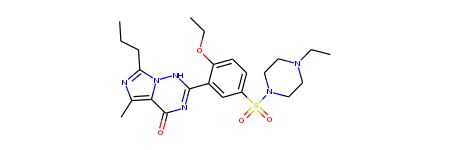

In [244]:
m2

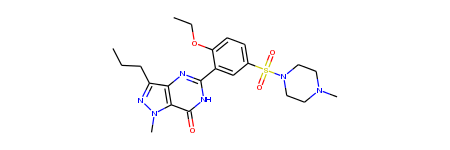

In [245]:
m

In [246]:
DataStructs.TanimotoSimilarity(fp,fp2)

0.5

#### Similarity Maps

(<matplotlib.figure.Figure at 0x6610310>, 0.14414414414414412)

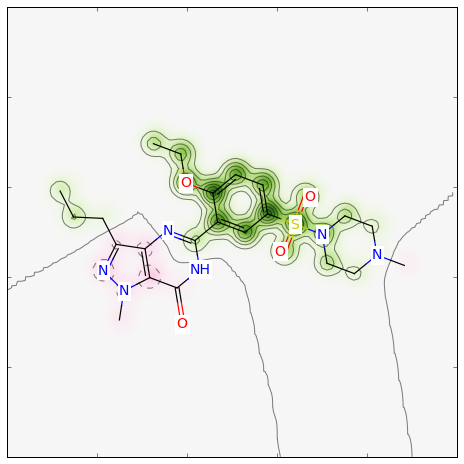

In [247]:
from rdkit.Chem.Draw import SimilarityMaps
SimilarityMaps.GetSimilarityMapForFingerprint(m2, m, SimilarityMaps.GetMorganFingerprint)

#### For more RDKit examples: http://www.rdkit.org/docs/GettingStartedInPython.html

### Using the RDKit database cartridge in myChEMBL

#### SMARTS-based substructure search

In [248]:
sma = 'C1C[!#1!#6]1' #oxirane or aziridine

In [249]:
from IPython.display import Image
from urllib import quote_plus

In [250]:
Image(url='http://www.smartsview.de/smartsview/auto/png/1/dynamic/{0}'.format(quote_plus(sma)))

In [251]:
import psycopg2

In [252]:
conn = psycopg2.connect(port=5432, user='chembl', dbname='chembl_XXX')

In [253]:
cur = conn.cursor()

In [254]:
sql1 = """
SELECT mr.*, md.chembl_id, cp.full_mwt, cp.alogp
from mols_rdkit mr, molecule_dictionary md, compound_properties cp
where
mr.m @> 'C1C[!#1!#6]1'::qmol
and
mr.molregno = md.molregno
and
md.molregno = cp.molregno
limit 100
"""

In [255]:
cur.execute(sql1)

In [256]:
for c in cur: print c

(463503, 'C=C1CC[C@@H]2O[C@@]2(C)CC[C@H]2[C@H]1C[C@]2(C)C(=O)/C=C/C(C)(C)O', 'CHEMBL463893', Decimal('318.45'), Decimal('3.35'))
(454174, 'C=C1CC[C@@H]2CCC3=C([C@@H](C[C@]4(C)O[C@H]4[C@@H](O)C1)OC3=O)C2(C)C', 'CHEMBL455707', Decimal('332.43'), Decimal('3.08'))
(460554, 'CCCNC(=O)[C@H]1O[C@@H]1C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)O)[C@@H](C)CC', 'CHEMBL490920', Decimal('383.44'), Decimal('0.26'))
(443194, 'CC1(C)CC[C@]2(C(=O)O)CC=C3[C@](C)([C@@H]2C1)[C@H]1O[C@H]1[C@@H]1[C@@]2(C)CC[C@H](O)C(C)(C)[C@@H]2CC[C@@]31C', 'CHEMBL517792', Decimal('470.68'), Decimal('5.21'))
(449863, 'C=C1C(=O)O[C@H]2[C@@H](O)C(C)=CCCC(C)=CCC[C@@]3(CO)O[C@@H]3C[C@H]12', 'CHEMBL513426', Decimal('348.43'), Decimal('2.76'))
(463369, 'C=C1C(=O)O[C@H]2[C@H]1CCC(C)=CCC[C@@]1(C)O[C@H]21', 'CHEMBL465158', Decimal('248.32'), Decimal('2.92'))
(463402, 'CC1(C)C[C@@H]2O[C@@]2(C)CC[C@H]2O[C@]2(C)C[C@@H]2O[C@H]21', 'CHEMBL465351', Decimal('252.35'), Decimal('1.59'))
(425373, 'C=C(C(=O)OC)[C@@H]1C[C@H](OC(C)=O)C2=C[C@H](C[C@@]3(C)O

#### Similarity-based (NN) search

In [257]:
smi = 'CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4' #sildenafil

In [258]:
sql2 = """
select molregno,m as smiles,tanimoto_sml(morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol),mfp2) as similarity
from fps_rdkit join mols_rdkit using (molregno)
where morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol)%mfp2
order by morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol)<%>mfp2;
"""


In [259]:
cur.execute(sql2)

In [260]:
for c in cur: print c

(410802, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 1.0)
(1351311, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12', 0.88135593220339)
(1351310, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12', 0.88135593220339)
(80636, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12', 0.866666666666667)
(80694, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12', 0.838709677419355)
(488008, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(c5ccccc5)CC4)ccc3OCC)nc12', 0.825396825396825)
(410662, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCC(=O)O)CC4)ccc3OCC)nc12', 0.8125)
(512303, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCC(C(N)=O)CC4)ccc3OCC)nc12', 0.8125)
(488072, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(c5ccc(F)cc5)CC4)ccc3OCC)nc12', 0.8)
(1334756, 'CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(C)nn(C)c2c(=O)[nH]1', 0.8)
(488151, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C5CCCCC5)CC4)ccc3OCC)nc12', 0.8)
(410656, 'CCCc1nn

#### More about the RDKit Cartridge here: http://www.rdkit.org/docs/Cartridge.html

### Working with Pandas

In [261]:
from rdkit.Chem import PandasTools
import pandas as pd

In [262]:
data = pd.read_sql(sql2, conn)

In [263]:
data.shape

(200, 3)

In [264]:
data.head()

,molregno,smiles,similarity
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356
2,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710


#### Filter the table

In [265]:
nn = data[data['similarity'] >= 0.8]

In [266]:
nn.shape

(12, 3)

In [267]:
nn.head()

,molregno,smiles,similarity
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356
2,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710


#### Add RDKit molecules and descriptors to the table

In [268]:
PandasTools.AddMoleculeColumnToFrame(data,smilesCol='smiles',molCol='mol',includeFingerprints=True)

,molregno,smiles,similarity,mol
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,
2,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,

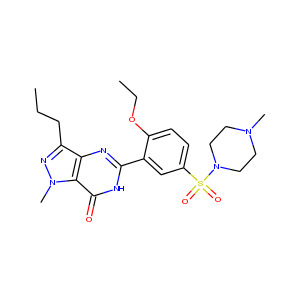
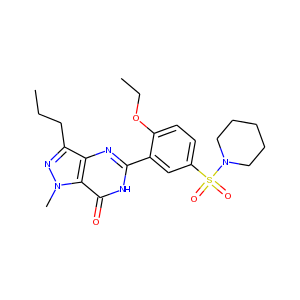
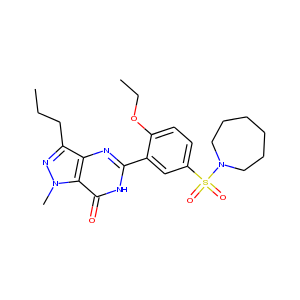
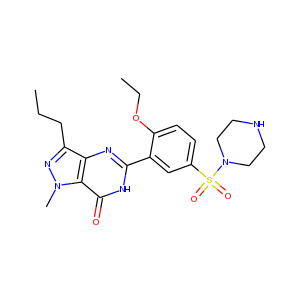
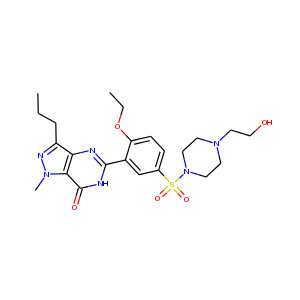

In [269]:
data.head()

In [270]:
data['logp'] = data['mol'].map(Descriptors.MolLogP)
data['mw'] = data['mol'].map(Descriptors.MolWt)

,molregno,smiles,similarity,mol,logp,mw
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,,2.8494,459.572
2,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,,3.2395,473.599
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,,1.2687,460.560
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,,0.9734,504.613

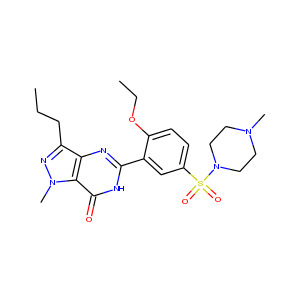
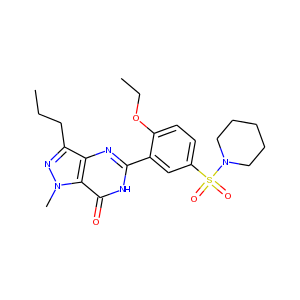
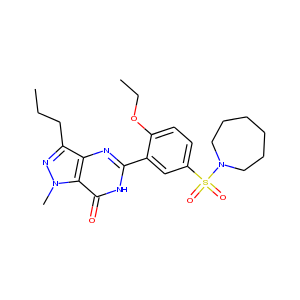
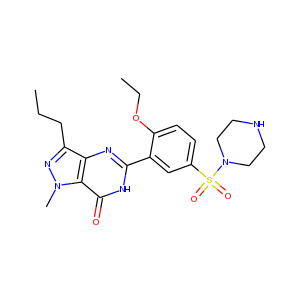
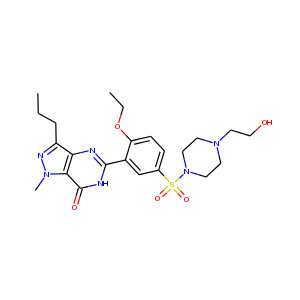

In [271]:
data.head()

,molregno,smiles,similarity,mol,logp,mw
199,1353821,CCCc1nn(C)c2c(=O)[nH]c(-c3cccc(Br)c3)nc12,0.5,,3.0386,347.216
190,453288,CCCc1c2nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)cnc3OCCOC)[nH]c(=O)c2nn1C,0.5,,1.0225,519.628
191,1351307,CCOc1ccc(S(=O)(=O)Nc2ccc(O)c(C(=O)O)c2)cc1-c1nc2c(C(C)(C)C)nn(C)c2c(=O)[nH]1,0.5,,3.2244,541.586
192,511950,CCCCN1C(=O)C2=C(N=C(c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)NC2)C1=O,0.5,,0.7942,489.598
193,326382,CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc(O)c2nc3cccc(CC)n3c2n1,0.5,,2.5473,496.593

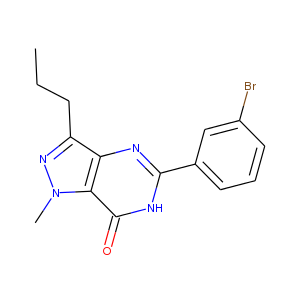
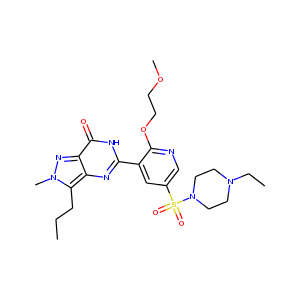
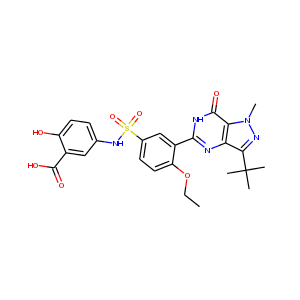
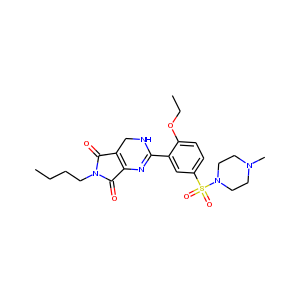
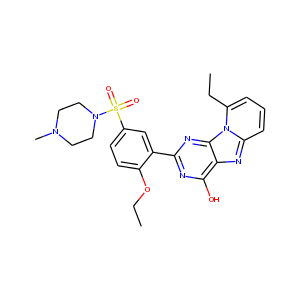

In [272]:
data.sort(columns=['similarity']).head()

#### Simple plotting using the table columns

In [273]:
data[['mw', 'logp']].describe()

,mw,logp
count,200.000000,200.000000
mean,484.914885,2.262777
std,90.848036,0.973333
min,268.320000,-0.048300
25%,447.304000,1.539875
50%,492.543500,2.289550
75%,535.143750,2.898525
max,866.980000,4.731700


In [274]:
rcParams['figure.figsize'] = 12,12

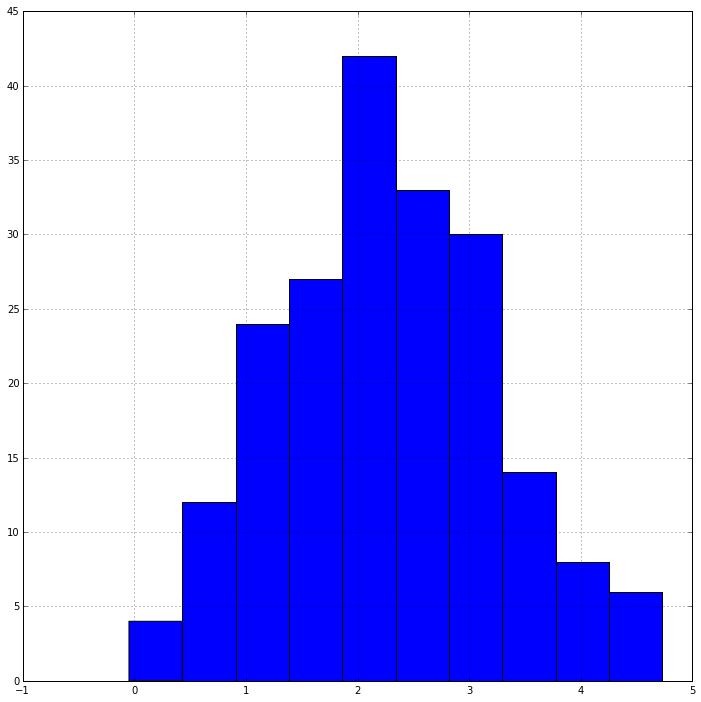

In [275]:
data['logp'].hist()

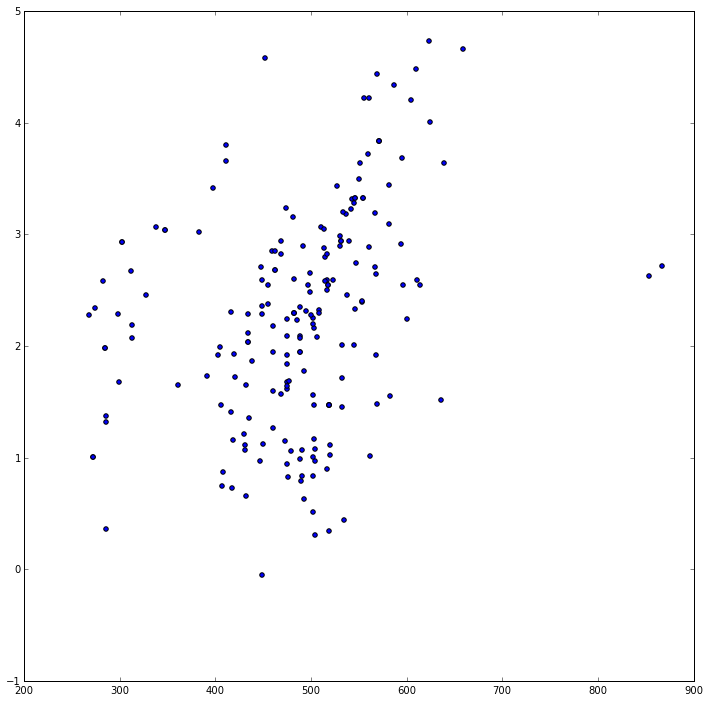

In [276]:
scatter(data['mw'],data['logp'])

,molregno,mol,mw,logp
62,487046,,852.997,2.6245
92,487045,,866.980,2.7168

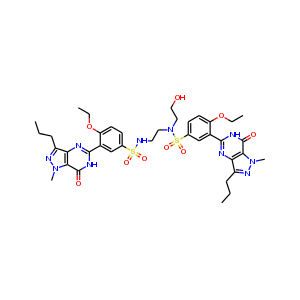
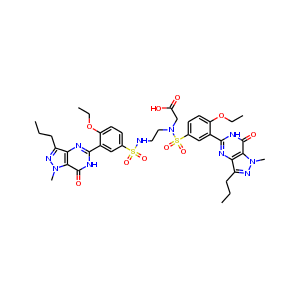

In [277]:
data[data['mw']>800][['molregno','mol','mw','logp']]

#### Substructure search within the table

In [278]:
qsmi = 'c1nn(C)c2c1nc[nH]c2=O'

In [279]:
qmol = Chem.MolFromSmiles(qsmi)

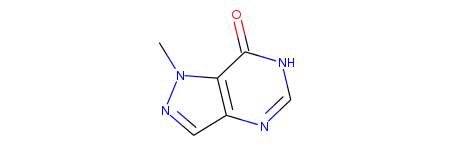

In [280]:
qmol

In [281]:
subset = data[data['mol'] >= qmol]

In [282]:
subset.shape

(90, 6)

,molregno,smiles,similarity,mol,logp,mw
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,,2.8494,459.572
2,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,,3.2395,473.599
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,,1.2687,460.560
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,,0.9734,504.613

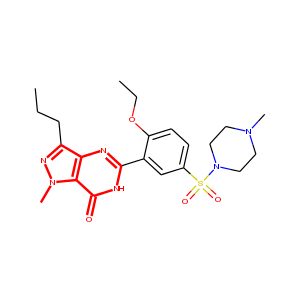
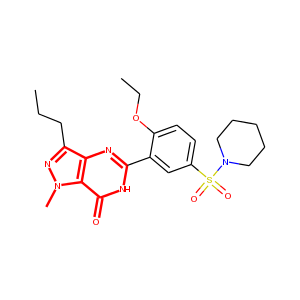
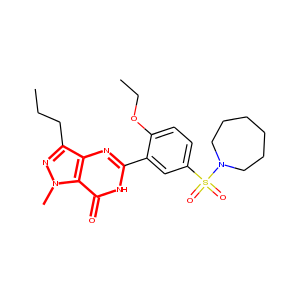
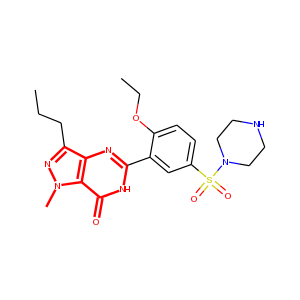
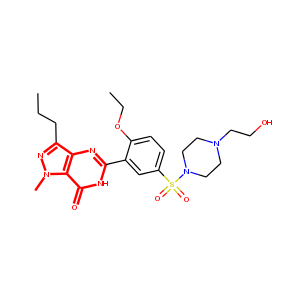

In [283]:
subset.head()

In [284]:
data.groupby(data['mol'] >= qmol).describe().unstack()

molregno                                                                               similarity                                                                   logp                                                                    mw                                                                         
         count           mean            std    min       25%       50%         75%      max      count      mean       std  min       25%       50%       75%       max count      mean       std     min       25%      50%      75%     max count        mean         std      min        25%      50%        75%      max
mol                                                                                                                                                                                                                                                                                                                          
False      110  847263.900000  573584.333725  28710  304748.0  563832.0  1441690.75  1746350        110  0.592656  0.053178  0.5  0.549091  0.598611  0.623188  0.734375   110  2.037163  0.783560 -0.0483  1.471425  2.08691  2.54820  4.4372   110  489.887500   47.549721  391.453  460.49850  489.106  518.64000  624.701
True        90  709987.411111  449869.213609  80558  410694.5  488009.5  1334760.50  1376119         90  0.670030  0.113819  0.5  0.567983  0.691176  0.753623  1.000000    90  2.538528  1.107499  0.3034  1.620075  2.65905  3.32205  4.7317    90  478.837244  124.968717  268.320  386.95875  504.591  558.42875  866.980

In [285]:
data['containsQ'] = data['mol'] >= qmol

,molregno,smiles,similarity,mol,logp,mw,containsQ
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587,True
1,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,,2.8494,459.572,True

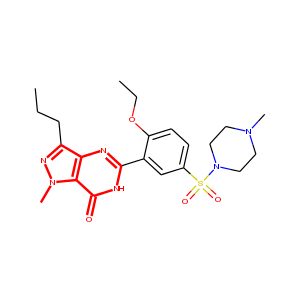
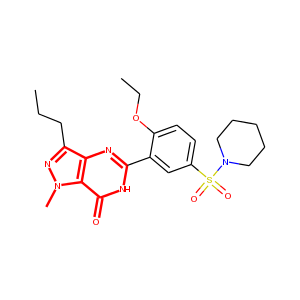

In [286]:
data.head(2)

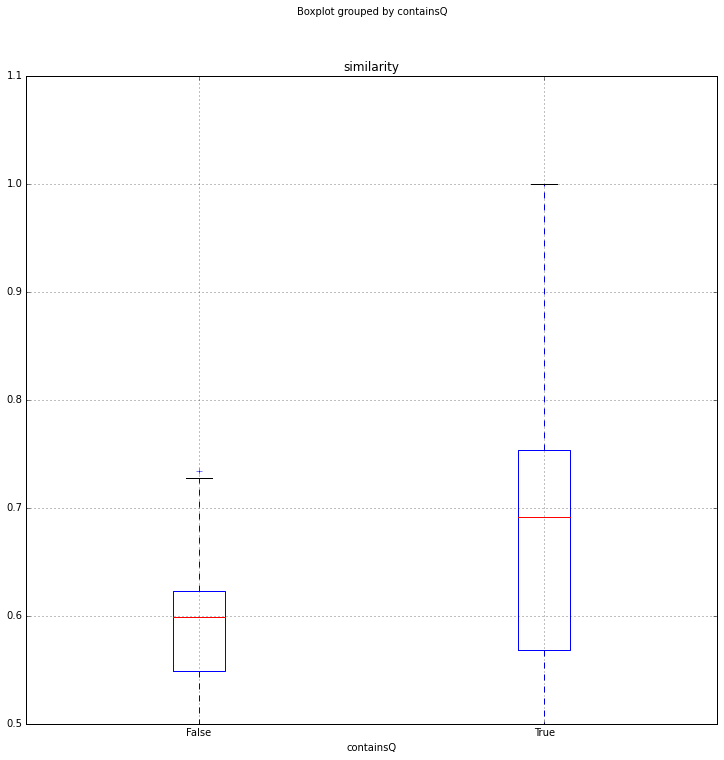

In [287]:
data.boxplot('similarity',by='containsQ')

In [288]:
conn.close()

#### More useful RDKit stuff here:  http://www.rdkit.org/UGM/2012/ and  https://github.com/rdkit/UGM_2013